[View in Colaboratory](https://colab.research.google.com/github/gpicron/certificatIAFpms/blob/master/cours1/classifier.ipynb)

# Cours 1 - partie 2 classifieur

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import np_utils

In [0]:
import numpy as np
np.random.seed(2017)

In [0]:
import cv2
from matplotlib import pyplot as plt

## Télécharger la base mnist de Keras

In [11]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


60000
28
28


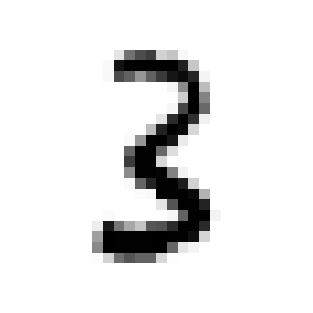

In [21]:
print(x_train.shape[0])
print(x_train.shape[1])
print(x_train.shape[2])
px = x_train[50000] # les val de l'image 50000
plt.xticks([]), plt.yticks([])
plt.imshow(px)

## Préparation des données




In [0]:
def clean(data):
  # reshape image data
  clean_data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
  # normalize data
  clean_data = clean_data.astype('float32') / 255
  
  return clean_data

x_train_clean = clean(x_train)
x_test_clean = clean(x_test)

In [0]:
# one hot encoding : example converrt 5 class label to (0,0,0,0,0,1,0,0,0,0)
nb_classes = 10
y_train_clean = np_utils.to_categorical(y_train, nb_classes)
y_test_clean = np_utils.to_categorical(y_test, nb_classes)


In [28]:
print(x_train_clean.shape[0])
print(x_train_clean.shape[1])

px = x_train_clean[50000] # les val de l'image 50000
plt.xticks([]), plt.yticks([])
plt.imshow(x_train_clean)

60000
784


## Définir le modèle de base et l'entraîner

In [38]:
model0 = Sequential()

model0.add(Dense(nb_classes, input_dim=x_train_clean.shape[1]))
model0.add(Activation('softmax'))

model0.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model0.fit(x_train_clean, y_train_clean, epochs=1)

score0 = model0.evaluate(x_test_clean, y_test_clean)

print("accuracy: ", score0)

Epoch 1/1
10000/10000 [==============================] - 1s 61us/step
accuracy:  [0.4771377581357956, 0.883]


In [40]:
model1 = Sequential()

model1.add(Dense(nb_classes, input_dim=x_train_clean.shape[1]))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model1.fit(x_train_clean, y_train_clean, epochs=20)

score1 = model1.evaluate(x_test_clean, y_test_clean)

print("accuracy: ", score1)

Epoch 1/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.7750 - acc: 0.8184
Epoch 2/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.4554 - acc: 0.8810
Epoch 3/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.4028 - acc: 0.8917
Epoch 4/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.3765 - acc: 0.8972
Epoch 5/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.3598 - acc: 0.9015
Epoch 6/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.3480 - acc: 0.9038
Epoch 7/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.3392 - acc: 0.9056
Epoch 8/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.3320 - acc: 0.9071
Epoch 9/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.3261 - acc: 0.9088
Epoch 10/20
60000/60000 [==============================] - 7s 125us/step - loss: 0.3213 - a

In [41]:
model2 = Sequential()

model2.add(Dense(100, activation="relu", input_dim=x_train_clean.shape[1]))
model2.add(Dense(nb_classes, activation="softmax"))


model2.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model2.fit(x_train_clean, y_train_clean, epochs=20)

score2 = model2.evaluate(x_test_clean, y_test_clean)

print("accuracy: ", score2)

Epoch 1/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.6444 - acc: 0.8379
Epoch 2/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.3393 - acc: 0.9054
Epoch 3/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.2917 - acc: 0.9184
Epoch 4/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.2620 - acc: 0.9267
Epoch 5/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.2398 - acc: 0.9334
Epoch 6/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.2217 - acc: 0.9377
Epoch 7/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.2066 - acc: 0.9421
Epoch 8/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.1937 - acc: 0.9459
Epoch 9/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.1822 - acc: 0.9486
Epoch 10/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.1722 - a